## Árvores de Decisão

In [56]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
dados = pd.read_csv('output95_update.csv')
sub_df = dados.drop(['LNWAGE'], axis='columns')
sub_df = sub_df[sub_df.EXPER > 0]
sub_df['y'] = (sub_df['WAGE'] > 15).astype(int)
y = sub_df['y'].values
X = sub_df.drop(['y','WAGE'], axis=1).values
nomes_covariadas=list(sub_df.drop(['y','WAGE'], axis=1))

Vamos verificar a evolução da acuracidade nas amostras de treino e teste de acordo com variações no parâmetro max_depth. Além disso, vamos comparar as importance features.

Para max_depth= 1
Accuracy na amostra de treino: 0.744
Accuracy na amostra de teste: 0.743
Feature importances:
[0. 0. 0. 1. 0. 0.]


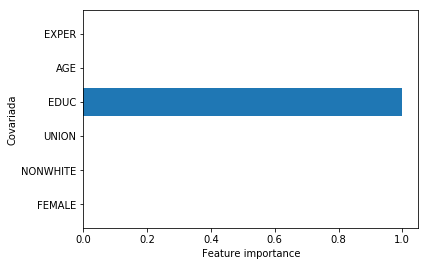

Para max_depth= 2
Accuracy na amostra de treino: 0.776
Accuracy na amostra de teste: 0.743
Feature importances:
[0.14258851 0.         0.         0.69530315 0.16210835 0.        ]


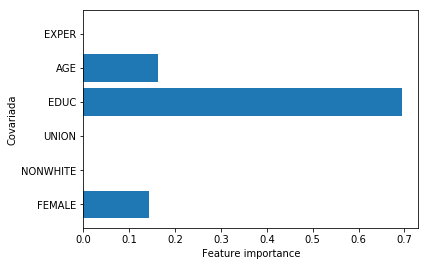

Para max_depth= 3
Accuracy na amostra de treino: 0.782
Accuracy na amostra de teste: 0.755
Feature importances:
[0.16062545 0.         0.         0.53454086 0.2670887  0.03774498]


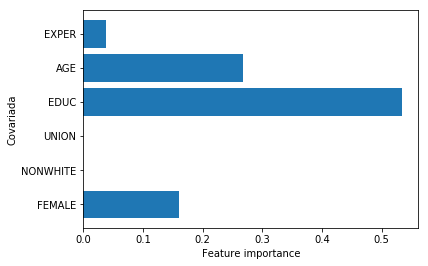

Para max_depth= 4
Accuracy na amostra de treino: 0.787
Accuracy na amostra de teste: 0.747
Feature importances:
[0.13512285 0.         0.02276421 0.52323883 0.28452844 0.03434567]


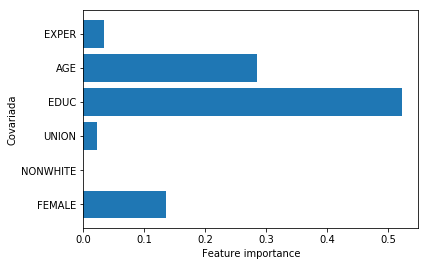

Para max_depth= 5
Accuracy na amostra de treino: 0.792
Accuracy na amostra de teste: 0.747
Feature importances:
[0.1393994  0.00873669 0.01992543 0.48775632 0.27668995 0.06749221]


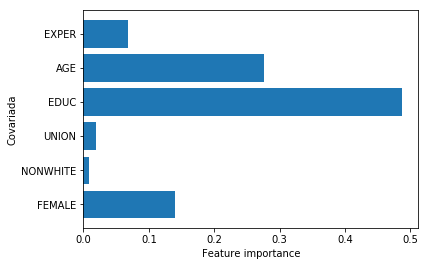

Para max_depth= 6
Accuracy na amostra de treino: 0.818
Accuracy na amostra de teste: 0.732
Feature importances:
[0.11181021 0.01007957 0.01598189 0.39122217 0.36277479 0.10813136]


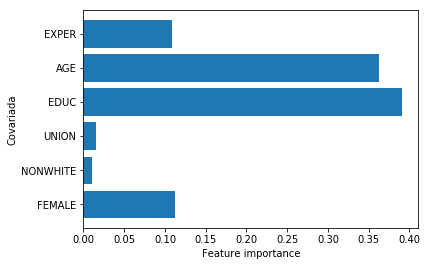

Para max_depth= 7
Accuracy na amostra de treino: 0.828
Accuracy na amostra de teste: 0.720
Feature importances:
[0.09859798 0.01813418 0.0263397  0.35134721 0.37861044 0.12697049]


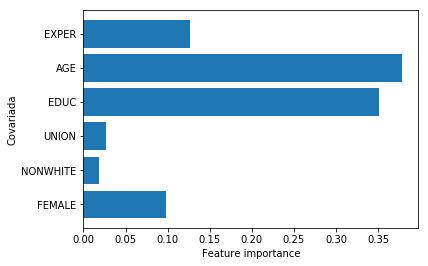

Para max_depth= 8
Accuracy na amostra de treino: 0.850
Accuracy na amostra de teste: 0.716
Feature importances:
[0.08499663 0.02460371 0.0383864  0.3116443  0.35292296 0.18744601]


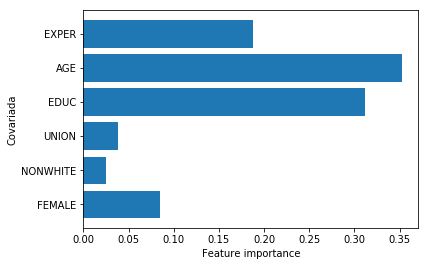

Para max_depth= 9
Accuracy na amostra de treino: 0.864
Accuracy na amostra de teste: 0.716
Feature importances:
[0.07488804 0.03337487 0.04991269 0.2903468  0.32830908 0.22316852]


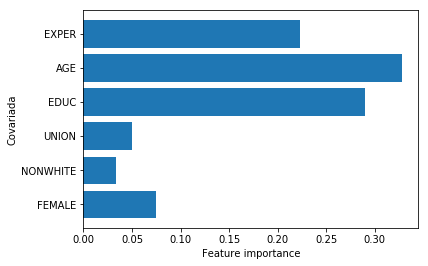

Para max_depth= 10
Accuracy na amostra de treino: 0.870
Accuracy na amostra de teste: 0.732
Feature importances:
[0.06999587 0.04138315 0.04980191 0.28019621 0.37298737 0.18563548]


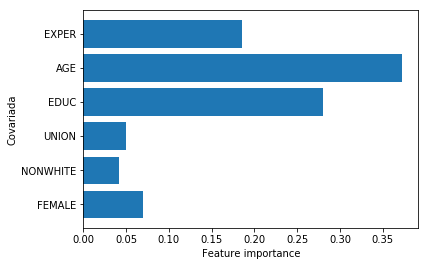

In [3]:
accuracy_train = []
accuracy_test = []
feature_importance = []
for i in range(1, 11):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
    tree_clf.fit(X_train, y_train)
    accuracy_train.append(round(tree_clf.score(X_train, y_train),4))
    accuracy_test.append(round(tree_clf.score(X_test, y_test),4))
    print("Para max_depth= {:}".format(i))
    print("Accuracy na amostra de treino: {:.3f}".format(tree_clf.score(X_train, y_train)))
    print("Accuracy na amostra de teste: {:.3f}".format(tree_clf.score(X_test, y_test)))
    print("Feature importances:\n{}".format(tree_clf.feature_importances_))
    n_features = X.shape[1]
    plt.barh(range(n_features), tree_clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), nomes_covariadas)
    plt.xlabel("Feature importance")
    plt.ylabel("Covariada")
    plt.show()
    avg=(tree_clf.feature_importances_)/6
    feature_importance.append(avg)
    

In [4]:
fi_avg = feature_importance[0]
for j in range (0, 9):
    fi_avg = fi_avg + feature_importance[j+1]


Abaixo, vamos plotar um grático que nos informa a média das feature importances para as 10 iterações

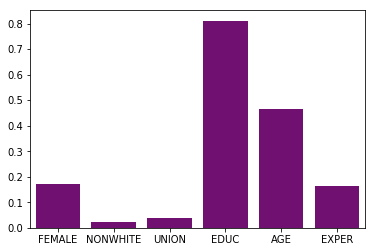

In [5]:
sns.barplot(y=fi_avg, x=nomes_covariadas, color = "purple")

Vamos plotar, também, um gráfico que mostra uma aproximação da distribuição de valores de feature importances para a média das 10 iterações

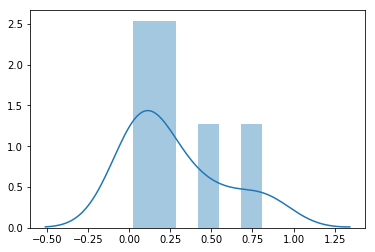

In [6]:
sns.distplot(fi_avg, bins=6)

Pelo gráfico abaixo, vemos que a accuracy aumenta na amostra de treino e diminui na amostra de teste
conforme a profundidade da árvore aumenta - o que é esperado, pois há mais risco de overfitting com maior profundidade

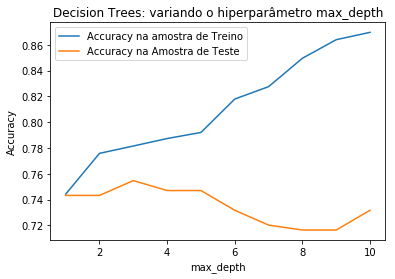

In [7]:
m_depth=range(1,11)
plt.title('Decision Trees: variando o hiperparâmetro max_depth')
plt.plot(m_depth, accuracy_train, label = 'Accuracy na amostra de Treino')
plt.plot(m_depth, accuracy_test, label = 'Accuracy na Amostra de Teste')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

### GridSearchCV para Árvore de Decisão

In [1]:
parameters = {'criterion':('gini','entropy'), 'max_depth':range(1,10)}

Analisaremos dois casos da Gridsearch. 

In [52]:
grids_cv =GridSearchCV(DecisionTreeClassifier(), parameters, cv = 3, return_train_score=True)
grids_cv.fit(X_train, y_train)
grids_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

O caso com cv = 3 retorna um parâmetro ótimo de max_depth = 3

In [53]:
grids_cv =GridSearchCV(DecisionTreeClassifier(), parameters, cv = 8, return_train_score=True)
grids_cv.fit(X_train, y_train)
grids_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

O caso com cv = 8 retorna um parâmetro ótimo de max_depth = 4
Agora, na amostra de teste:

In [54]:
grids_cv.best_estimator_.score(X_test, y_test)

0.7471264367816092

In [55]:
grids_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## SCV

In [57]:
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 6)

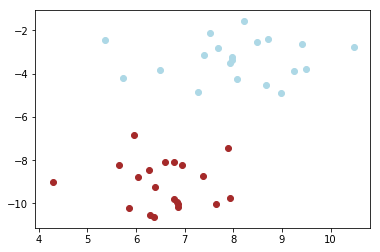

In [58]:
def plot_data(X,y):
    class0 = np.where(y==0)[0]
    plt.scatter(X[class0,0], X[class0,1], c='lightblue')
    class1 = np.where(y==1)[0]
    plt.scatter(X[class1,0], X[class1,1], c='brown')
plot_data(X,y)
plt.show()

In [59]:
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)
#Aqui C é um parametro de cross validation

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

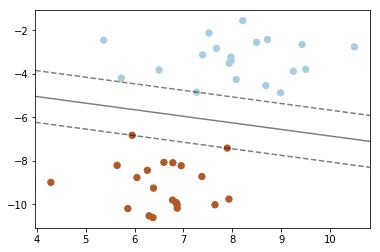

In [60]:
#Plotando as margens
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

In [61]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [62]:
#indice
clf.support_

array([16, 21, 30])

In [63]:
#numero de vetores de suporte
clf.n_support_

array([1, 2])

In [64]:
#separando agora para amostra de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00         8



In [ ]:
#vamos agora ver para o caso em que nao temos dados perfeitamente separaveis lineares

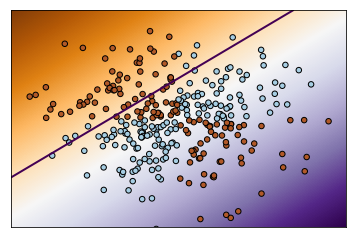

             precision    recall  f1-score   support

      False       0.70      0.94      0.80        32
       True       0.88      0.54      0.67        28

avg / total       0.78      0.75      0.74        60



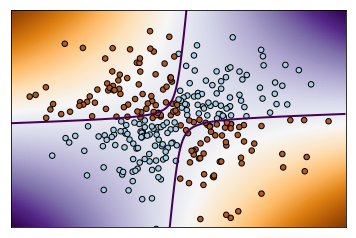

             precision    recall  f1-score   support

      False       0.89      1.00      0.94        32
       True       1.00      0.86      0.92        28

avg / total       0.94      0.93      0.93        60



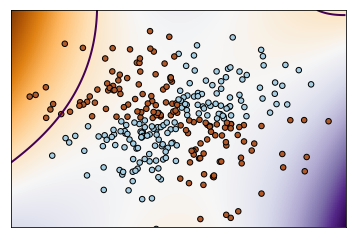

             precision    recall  f1-score   support

      False       0.56      1.00      0.72        32
       True       1.00      0.11      0.19        28

avg / total       0.77      0.58      0.47        60



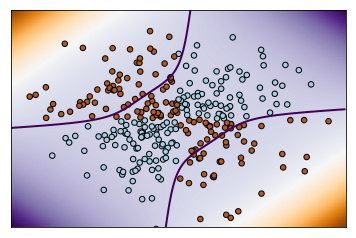

             precision    recall  f1-score   support

      False       0.82      1.00      0.90        32
       True       1.00      0.75      0.86        28

avg / total       0.90      0.88      0.88        60



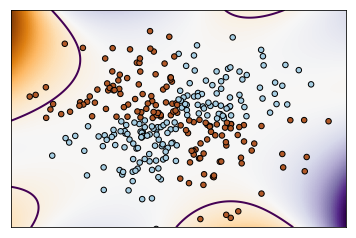

             precision    recall  f1-score   support

      False       0.56      1.00      0.72        32
       True       1.00      0.11      0.19        28

avg / total       0.77      0.58      0.47        60



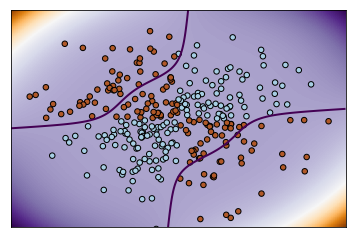

             precision    recall  f1-score   support

      False       0.78      1.00      0.88        32
       True       1.00      0.68      0.81        28

avg / total       0.88      0.85      0.84        60



In [66]:
for i in range(1,7):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
    np.random.seed(0)
    X = np.random.randn(300, 2)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

    # fit the model

    clf = SVC(kernel = 'poly', degree = i )
    clf.fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.show()
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify=Y)
    from sklearn.metrics import classification_report
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

In [67]:
#parametros
parameters = {'degree':range(1, 10)}

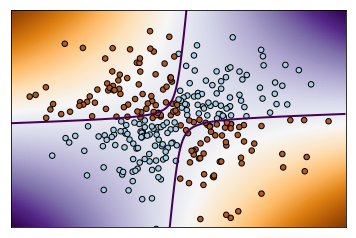

             precision    recall  f1-score   support

      False       0.89      1.00      0.94        32
       True       1.00      0.86      0.92        28

avg / total       0.94      0.93      0.93        60



In [68]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

    # fit the model

svc = SVC(kernel = 'poly')
clf = GridSearchCV(svc, parameters)
clf.fit(X, Y)
clf.best_estimator_
    # plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify=Y)
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [69]:
#verificando qual o melhor valor dos parametros utilizados
clf.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

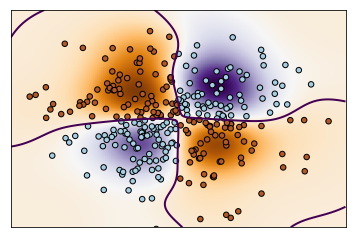

             precision    recall  f1-score   support

      False       1.00      1.00      1.00        32
       True       1.00      1.00      1.00        28

avg / total       1.00      1.00      1.00        60



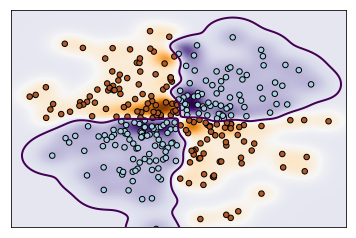

             precision    recall  f1-score   support

      False       1.00      1.00      1.00        32
       True       1.00      1.00      1.00        28

avg / total       1.00      1.00      1.00        60



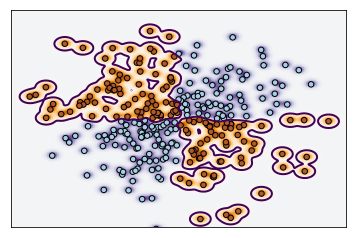

             precision    recall  f1-score   support

      False       1.00      1.00      1.00        32
       True       1.00      1.00      1.00        28

avg / total       1.00      1.00      1.00        60



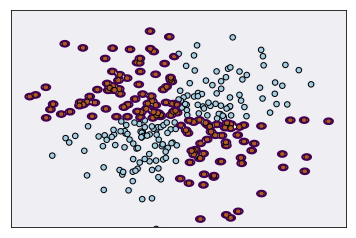

             precision    recall  f1-score   support

      False       1.00      1.00      1.00        32
       True       1.00      1.00      1.00        28

avg / total       1.00      1.00      1.00        60



In [70]:
g = [1, 10, 100, 500]
for i in g:
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
    np.random.seed(0)
    X = np.random.randn(300, 2)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

    # fit the model
    clf = SVC(kernel = 'rbf', gamma= i, C=1000)
    clf.fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
        origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.show()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify=Y)
    from sklearn.metrics import classification_report
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

In [71]:
parameters = {'gamma':range(1, 12), 'C':range(1, 12)}

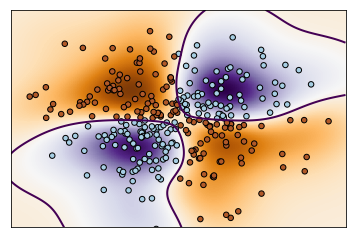

             precision    recall  f1-score   support

      False       1.00      1.00      1.00        32
       True       1.00      1.00      1.00        28

avg / total       1.00      1.00      1.00        60



In [72]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
#gridsearch 
svc = SVC()
clf = GridSearchCV(svc, parameters)

# fit the model
clf.fit(X, Y)
    # plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
        origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

#metricas
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify=Y)

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [73]:
#verificando qual o melhor valor dos hiperparametros:
clf.best_estimator_

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)